<a href="https://colab.research.google.com/github/kpclifton/Biocrew/blob/master/datavisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
## this sets some style parameters
sns.set()

In [0]:
## Download in the data if it's not already there
! if [ ! -e 2018_PUDB_EXPORT_123118.csv ] ; \
  then wget https://raw.githubusercontent.com/kpclifton/Biocrew/master/DataAnalysisSummary.csv; \
fi

--2019-10-20 03:05:07--  https://raw.githubusercontent.com/kpclifton/Biocrew/master/DataAnalysisSummary.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 984 [text/plain]
Saving to: ‘DataAnalysisSummary.csv.1’

DataAnalysisSummary 100%[===================>]     984  --.-KB/s    in 0s      

2019-10-20 03:05:07 (307 MB/s) - ‘DataAnalysisSummary.csv.1’ saved [984/984]



In [0]:
## Read in the data and display a few rows
dat = pd.read_csv("/content/DataAnalysisSummary.csv")
dat

,Promoter,Relative Expression,Team
0,J23100,1.000000,2006 Berkeley iGEM
1,J23101,0.700000,2006 Berkeley iGEM
2,J23103,0.010000,2006 Berkeley iGEM
3,J23105,0.240000,2006 Berkeley iGEM
4,J23118,0.560000,2006 Berkeley iGEM
5,J23100,1.000000,2019 Baltimore Biocrew
6,J23101,0.000014,2019 Baltimore Biocrew
7,J23103,0.808508,2019 Baltimore Biocrew
8,J23105,1.934106,2019 Baltimore Biocrew
9,J23100,1.000000,2019 Baltimore Biocrew


In [0]:
#df2 = pd.DataFrame([[1, 0.7, 0.01, 0.24]], columns=['J23100', 'J23101','J23103', 'J23105'] )
#dat =dat.append(df2)
#dat

In [0]:
#dat['Team'] = ['2019 Baltimore Biocrew', '2019 Baltimore Biocrew', '2019 Baltimore Biocrew','2019 Baltimore Biocrew', '2019 Baltimore Biocrew','2019 Baltimore Biocrew', '2006 Berkeley iGEM']
#dat

In [0]:
list(dat)

['Promoter', 'Relative Expression', 'Team']

(0, 5)

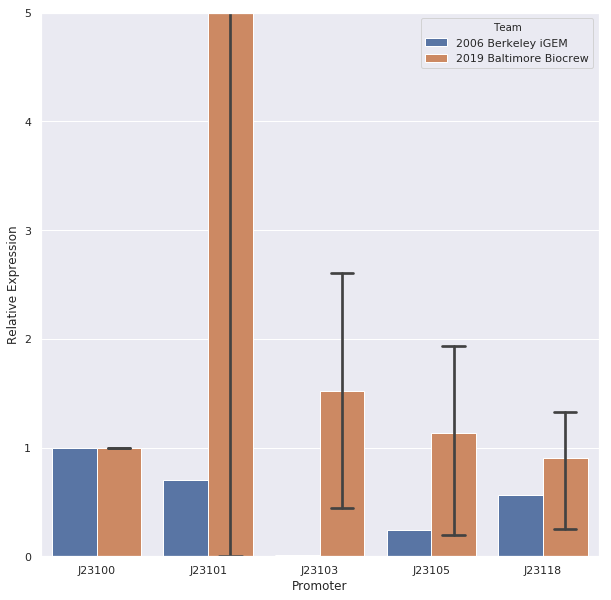

In [0]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10, 10)
sns.barplot(x="Promoter", y="Relative Expression", hue="Team", data=dat, capsize=.2, ax=ax)
plt.ylim(0,5)

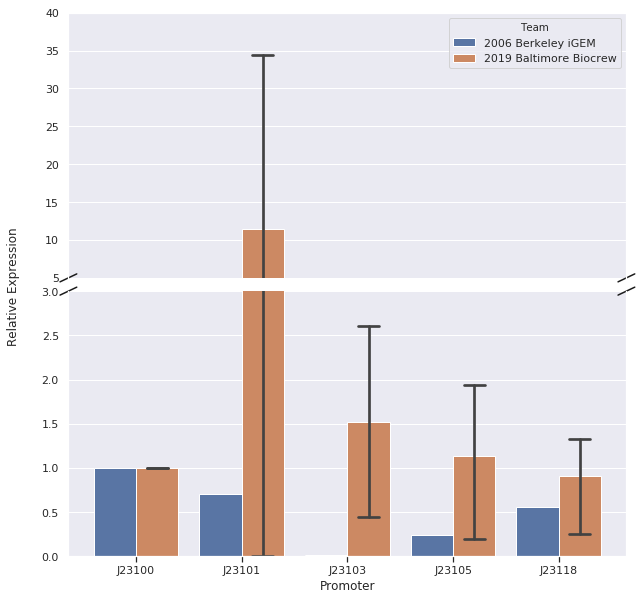

In [0]:
# If we were to simply plot pts, we'd lose most of the interesting
# details due to the outliers. So let's 'break' or 'cut-out' the y-axis
# into two portions - use the top (ax) for the outliers, and the bottom
# (ax2) for the details of the majority of our data
f, (ax, ax2) = plt.subplots(2, 1, sharex=True)
f.set_size_inches(10, 10)

# plot the same data on both axes
sns.barplot(x="Promoter", y="Relative Expression", hue="Team", data=dat, capsize=.2, ax=ax)
sns.barplot(x="Promoter", y="Relative Expression", hue="Team", data=dat, capsize=.2, ax=ax2)
#ax.plot(pts)
#ax2.plot(pts)

# zoom-in / limit the view to different portions of the data
ax.set_ylim(5, 40)  # outliers only
ax2.set_ylim(0, 3)  # most of the data

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

#hide legend on ax2
ax2.get_legend().remove()
#center y axis label
ax.set_ylabel('')
ax2.set_ylabel('')
f.text(0.04, 0.5, 'Relative Expression', va='center', rotation='vertical')
#remove xlabel on top subplot
ax.set_xlabel('')
f.subplots_adjust(hspace=0.05)

# This looks pretty good, and was fairly painless, but you can get that
# cut-out diagonal lines look with just a bit more work. The important
# thing to know here is that in axes coordinates, which are always
# between 0-1, spine endpoints are at these locations (0,0), (0,1),
# (1,0), and (1,1).  Thus, we just need to put the diagonals in the
# appropriate corners of each of our axes, and so long as we use the
# right transform and disable clipping.

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal


In [0]:
plt.show()

In [0]:
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


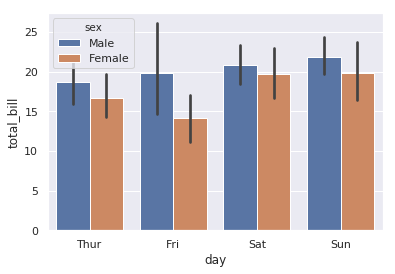

In [0]:
ax = sns.barplot(x="day", y="total_bill", hue="sex", data=tips)

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


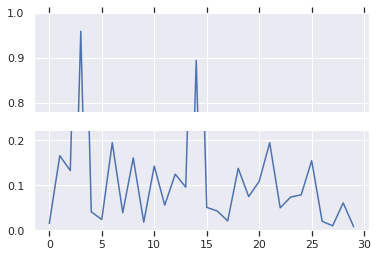

In [0]:
pts = np.array([
    0.015, 0.166, 0.133, 0.159, 0.041, 0.024, 0.195, 0.039, 0.161, 0.018,
    0.143, 0.056, 0.125, 0.096, 0.094, 0.051, 0.043, 0.021, 0.138, 0.075,
    0.109, 0.195, 0.050, 0.074, 0.079, 0.155, 0.020, 0.010, 0.061, 0.008])

# Now let's make two outlier points which are far away from everything.
pts[[3, 14]] += .8

# If we were to simply plot pts, we'd lose most of the interesting
# details due to the outliers. So let's 'break' or 'cut-out' the y-axis
# into two portions - use the top (ax) for the outliers, and the bottom
# (ax2) for the details of the majority of our data
f, (ax, ax2) = plt.subplots(2, 1, sharex=True)

# plot the same data on both axes
ax.plot(pts)
ax2.plot(pts)

# zoom-in / limit the view to different portions of the data
ax.set_ylim(.78, 1.)  # outliers only
ax2.set_ylim(0, .22)  # most of the data

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop='off')  # don't put tick labels at the top
ax2.xaxis.tick_bottom()